In [53]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from plots import *

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import time

In [54]:
def compute_cost_vec(x, y, w, b):
    m = x.shape[0]
    
    f_wb = w * x + b
    cost = np.sum((f_wb - y)**2)
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [55]:
def compute_gradient_vec(x, y, w, b):
    m = x.shape[0]
    
    f_wb = w * x + b
    dj_dw = np.mean((f_wb - y) * x)
    dj_db = np.mean(f_wb - y)
    
    return dj_dw, dj_db

In [56]:
def gradient_descent_vec(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = w_in
    b = b_in
    
    J_history = []
    p_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        b = b - alpha * np.mean(dj_db)
        w = w - alpha * np.mean(dj_dw)
        
        J_history.append(cost_function(x, y, w, b))
        p_history.append([w, b])
        
        if i % (num_iters // 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]}",
                  f"dj_dw: {np.mean(dj_dw)}, dj_db: {np.mean(dj_db)}",
                  f"w: {w}, b: {b}")
 
    return w, b, J_history, p_history

##### Read Data Set: House Pricing from Kaggle

https://www.kaggle.com/code/emrearslan123/house-price-prediction/notebook

In [57]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")

In [58]:
selected_df = df[['TotalBsmtSF', 'SalePrice']]  # A plot of TotalBsmtSF: Total square feet of basement area vs SalePrice

Text(0, 0.5, 'SalePrice')

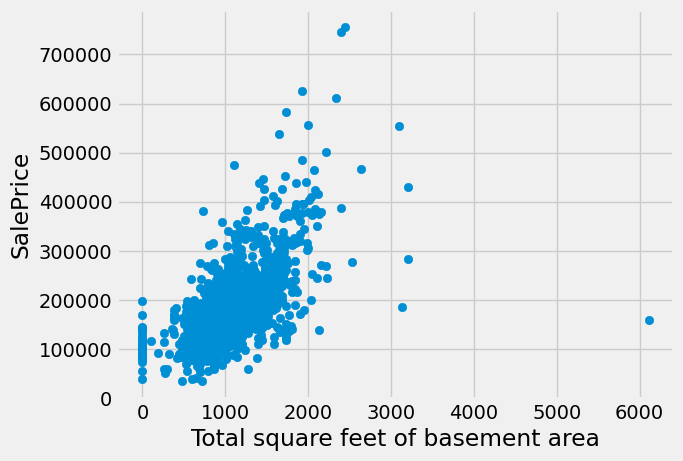

In [59]:
plt.scatter(df['TotalBsmtSF'], df['SalePrice'])
plt.xlabel('Total square feet of basement area')
plt.ylabel('SalePrice')

In [60]:
N = len(selected_df)
N

1460

In [61]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N * 0.8)]

# Uses the remaining indices for validation
val_idx = idx[int(N * 0.8):]

# Split the data into training and validation sets using selected_df
X_train, y_train = selected_df.loc[train_idx, "TotalBsmtSF"], selected_df.loc[train_idx, "SalePrice"]
X_val, y_val = selected_df.loc[val_idx, "TotalBsmtSF"], selected_df.loc[val_idx, "SalePrice"]

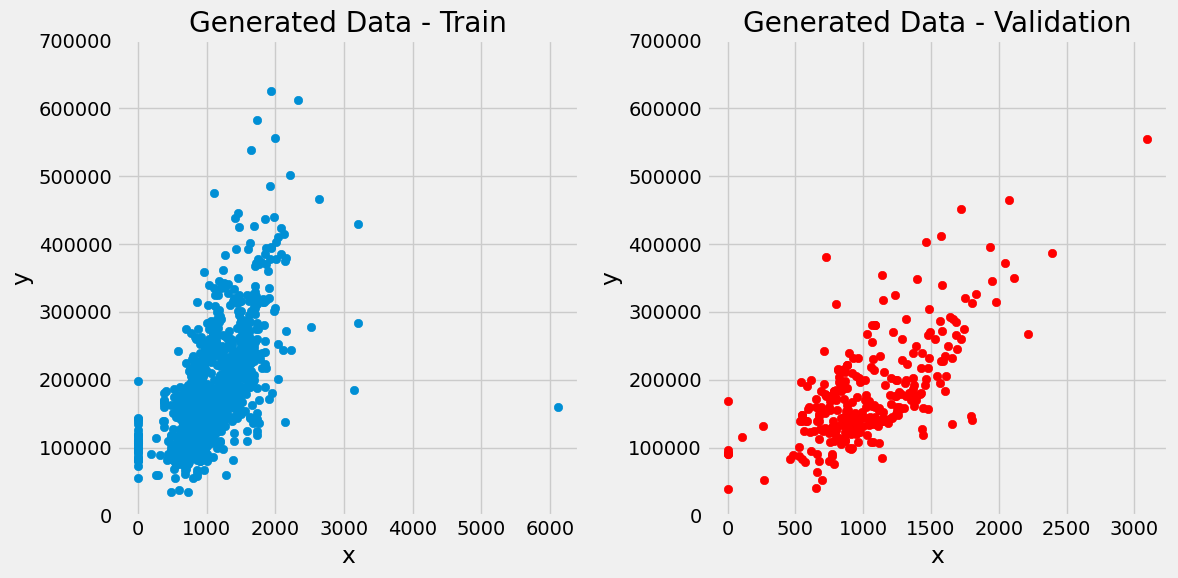

In [62]:
from plots import *
plot_train_test(X_train,y_train,X_val,y_val)

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
type(X_train)

(1168,)
(1168,)
(292,)
(292,)


pandas.core.series.Series

In [64]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 50000
tmp_alpha = 1e-10
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent_vec(X_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost_vec, compute_gradient_vec)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

Iteration    0: Cost 19631720840.71612 dj_dw: -213492593.92380136, dj_db: -181045.74143835617 w: 0.021349259392380138, b: 1.810457414383562e-05
Iteration 5000: Cost 6992384791.053223 dj_dw: -110222633.92512825, dj_db: -98225.58892755785 w: 78.12084420461312, b: 0.06756689347977954
Iteration 10000: Cost 3623390791.7965474 dj_dw: -56906089.39784915, dj_db: -55466.93591851211 w: 118.44229879765511, b: 0.10481855557565145
Iteration 15000: Cost 2725391019.4266634 dj_dw: -29379653.633123275, dj_db: -33391.361725825445 w: 139.25958615158723, b: 0.12642832017302774
Iteration 20000: Cost 2486030640.9548826 dj_dw: -15168217.527733002, dj_db: -21994.113473109282 w: 150.00719979706855, b: 0.1399624358319108
Iteration 25000: Cost 2422229495.472928 dj_dw: -7831091.940396435, dj_db: -16109.90541584502 w: 155.55601016366006, b: 0.14932722950603877
Iteration 30000: Cost 2405223371.019934 dj_dw: -4043057.326219912, dj_db: -13071.987345185364 w: 158.4207657817958, b: 0.15653947214186534
Iteration 35000: 

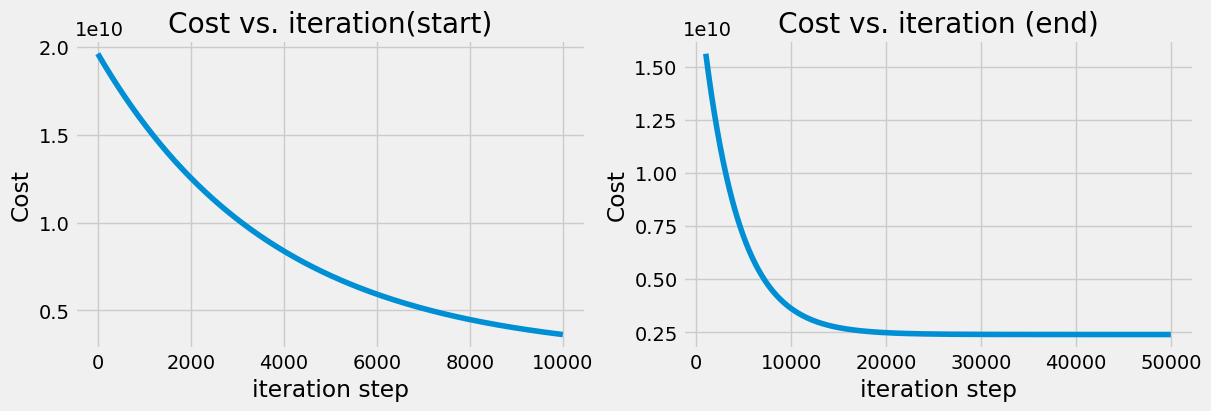

In [65]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:10000])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

Text(0.5, 0, 'x')

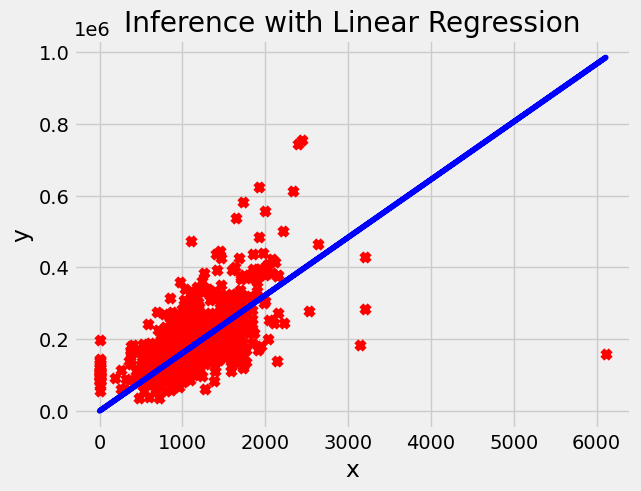

In [66]:
predicted = w_final * X_train + b_final

# Plot the linear fit
plt.plot(X_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(X_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Inference with Linear Regression")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')

## Model Metric

#### ----------Linear Regresson-----------

In [67]:
X_train_new = X_train.values.reshape(-1, 1)  # Convert to NumPy array and reshape X_train
y_train_new = y_train.values.reshape(-1) 
X_val_new = X_val.values.reshape(-1, 1)
y_val_new = y_val.values.reshape(-1)

In [68]:
start_time = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train_new, y_train_new)
lr_predictions = lr_model.predict(X_val_new)
lr_time = time.time() - start_time
lr_r2_score = r2_score(y_val, lr_predictions)

In [69]:
print("scikit-learn LinearRegression:")
print(f"Time taken: {lr_time} seconds")
print(f"R2 Score: {lr_r2_score}")

scikit-learn LinearRegression:
Time taken: 0.0 seconds
R2 Score: 0.449494609147699


##### --------------Custom Gradiant---------------

In [71]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 50000
tmp_alpha = 1e-10
start_time = time.time()
w_final, b_final, J_hist, p_hist = gradient_descent_vec(X_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost_vec, compute_gradient_vec)
custom_predictions = np.dot(X_val, w_final) + b_final
custom_time = time.time() - start_time
custom_r2_score = r2_score(y_val, custom_predictions)

Iteration    0: Cost 19631720840.71612 dj_dw: -213492593.92380136, dj_db: -181045.74143835617 w: 0.021349259392380138, b: 1.810457414383562e-05
Iteration 5000: Cost 6992384791.053223 dj_dw: -110222633.92512825, dj_db: -98225.58892755785 w: 78.12084420461312, b: 0.06756689347977954
Iteration 10000: Cost 3623390791.7965474 dj_dw: -56906089.39784915, dj_db: -55466.93591851211 w: 118.44229879765511, b: 0.10481855557565145
Iteration 15000: Cost 2725391019.4266634 dj_dw: -29379653.633123275, dj_db: -33391.361725825445 w: 139.25958615158723, b: 0.12642832017302774
Iteration 20000: Cost 2486030640.9548826 dj_dw: -15168217.527733002, dj_db: -21994.113473109282 w: 150.00719979706855, b: 0.1399624358319108
Iteration 25000: Cost 2422229495.472928 dj_dw: -7831091.940396435, dj_db: -16109.90541584502 w: 155.55601016366006, b: 0.14932722950603877
Iteration 30000: Cost 2405223371.019934 dj_dw: -4043057.326219912, dj_db: -13071.987345185364 w: 158.4207657817958, b: 0.15653947214186534
Iteration 35000: 

In [72]:
print("\nCustom Gradient Descent:")
print(f"Time taken: {custom_time} seconds")
print(f"R2 Score: {custom_r2_score}")


Custom Gradient Descent:
Time taken: 57.217650175094604 seconds
R2 Score: 0.3826016800900628


#### ----------Final Comparision-------------

In [73]:
from tabulate import tabulate

table = [["Method", "Time taken (seconds)", "R2 Score"],
         ["scikit-learn LinearRegression", lr_time, lr_r2_score],
         ["Custom Gradient Descent", custom_time, custom_r2_score]]

print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))


╒═══════════════════════════════╤════════════════════════╤════════════╕
│ Method                        │   Time taken (seconds) │   R2 Score │
╞═══════════════════════════════╪════════════════════════╪════════════╡
│ scikit-learn LinearRegression │                 0      │   0.449495 │
├───────────────────────────────┼────────────────────────┼────────────┤
│ Custom Gradient Descent       │                57.2177 │   0.382602 │
╘═══════════════════════════════╧════════════════════════╧════════════╛
